 **Made By :-  Ashu Kumar**

# <center>Credit Card Fraud Detection</center>

The goal of this project is to build a detection model that detect Credit card Fraud. Here's a brief description of the columns:

+ id: An identifier for each transaction.
+ V1 to V28: These are likely anonymized features or variables extracted from the credit card transaction data. These features could represent various aspects of the transaction, such as transaction amount, time, or other relevant information. The specific meaning of these features would depend on the dataset's documentation or context.
+ Amount: The transaction amount, which represents the value of the transaction in a given currency.
+ Class: This column indicates whether the transaction is classified as "fraudulent" or "non-fraudulent." It's a binary classification label, where 1 might represent a fraudulent transaction and 0 a non-fraudulent one.

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import metrics
import zipfile
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline
sns.set(color_codes=True)

**Load the dataset into jupyter notebook**

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


**Retrieve the shape of the dataset, which indicates the number of rows and columns it contains.**

In [4]:
df.shape

(568630, 31)

**Conduct an examination of the columns present in the dataset.**

In [5]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Retrieve the information summary of the dataset, including details such as column names, data types, non-null counts, and memory usage.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

**Obtain the statistical summary of the dataset, the 'describe' function was employed.**

In [7]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,-1.183592e-16,-5.758017e-17,-5.698037e-18,-4.078595e-17,2.649087e-17,-1.719408e-17,-3.398829e-17,-5.837989e-17,2.479146e-17,-1.579456e-17,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,-5.954723e+00,-2.020399e+00,-5.955227e+00,-2.107417e+00,-3.861813e+00,-2.214513e+00,-2.484938e+00,-2.421949e+00,-7.804988e+00,-7.814784e+01,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,-7.014495e-01,-8.311331e-01,-6.966667e-01,-8.732057e-01,-6.212485e-01,-7.162655e-01,-6.194913e-01,-5.560458e-01,-5.653082e-01,-3.502399e-01,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,-4.104986e-02,1.620521e-01,1.760812e-02,2.305011e-01,-3.925566e-02,1.340262e-01,2.716407e-01,8.729382e-02,-2.597869e-02,-1.233776e-01,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,7.477730e-01,7.446723e-01,6.856048e-01,7.518216e-01,6.654065e-01,6.556061e-01,5.182242e-01,5.443887e-01,5.601164e-01,2.482164e-01,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,2.513573e+00,1.791356e+01,7.187486e+00,1.916954e+01,1.453220e+01,4.665291e+01,6.994124e+00,6.783716e+00,3.831672e+00,2.987281e+01,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


**Conduct an examination of the distinct values present in each column of the dataset.**

In [8]:
df.nunique()

id        568630
V1        552035
V2        552035
V3        552035
V4        552035
V5        552035
V6        552035
V7        552035
V8        552035
V9        552035
V10       552035
V11       552035
V12       552035
V13       552035
V14       552035
V15       552035
V16       552035
V17       552035
V18       552035
V19       552035
V20       552035
V21       552035
V22       552035
V23       552035
V24       552035
V25       552035
V26       552035
V27       552035
V28       552035
Amount    506485
Class          2
dtype: int64

**Perform an assessment of the presence of null values in the columns of the dataset.**

In [9]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Conducting an assessment to identify and examine duplicate values within the dataset.**

In [10]:
df.duplicated().sum()

0

## Data Visualization

**Determine the frequency or count of classes to check the  "fraudulent" or "non-fraudulent" number.**

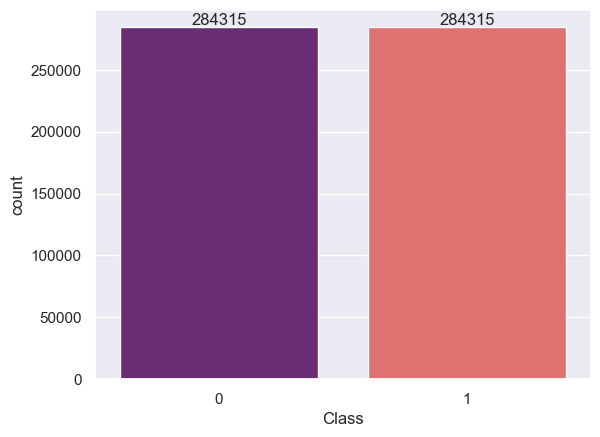

In [11]:
ax = sns.countplot(x='Class',data=df,palette='magma')
ax.bar_label(ax.containers[0])
plt.show()

In this data, there is a eqal cout of 0 and 1.

**Generate a histplot to visually analyze the count of Amount Variable.**

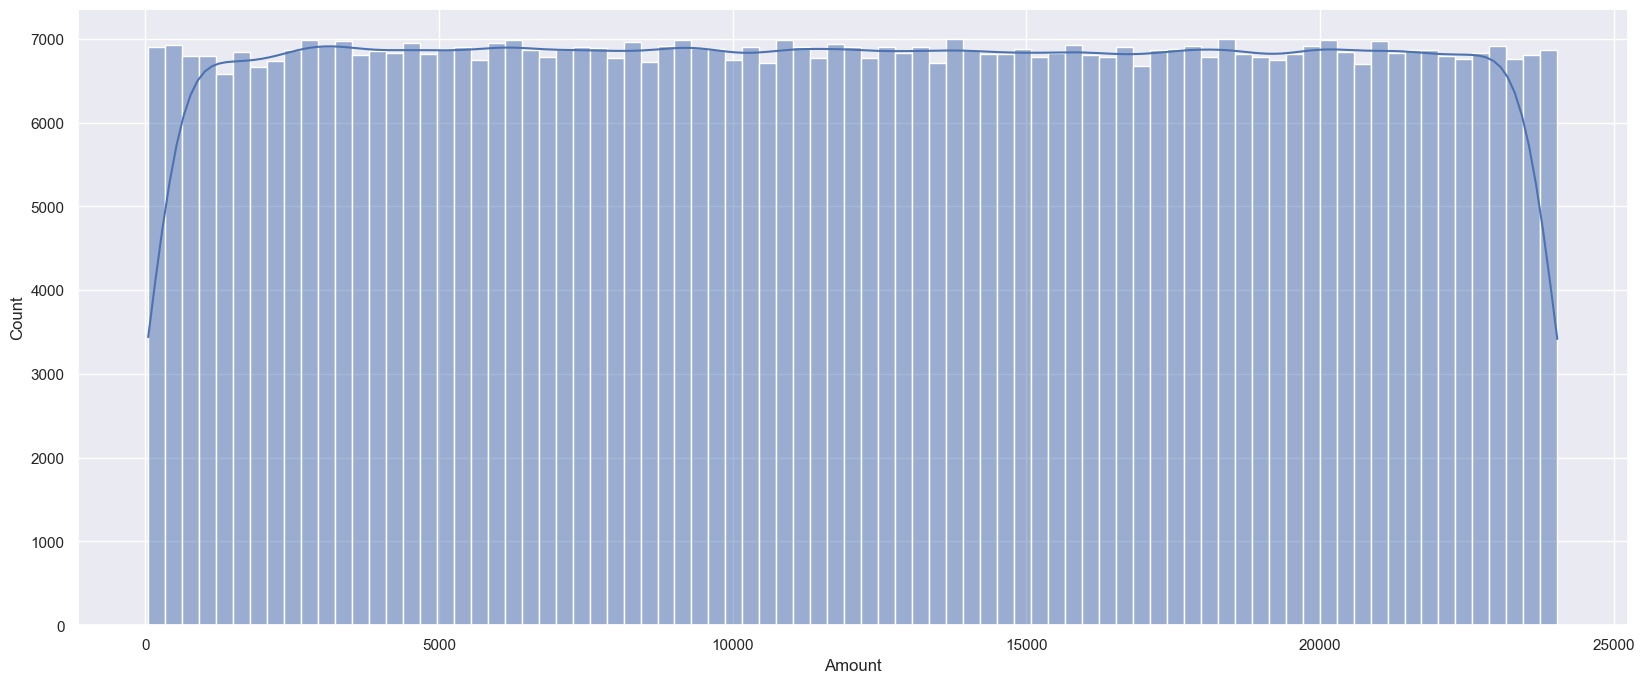

In [12]:
plt.figure(figsize=(20,8))
ax = sns.histplot(x='Amount',data=df,palette='magma',kde=True)
ax.bar_label(ax.containers[0])
plt.show()

According to the presented diagram, the data reveals a range of transaction amounts, with the minimum value recorded at 50 rupees and the maximum at 24,039 rupees. Notably, the distribution of transaction amounts exhibits a relatively uniform count across most of the range, suggesting a consistent frequency of occurrence for different amounts.

**Lets check the skewness of the data.**

In [13]:
df.skew()

id       -6.579536e-16
V1       -8.341717e-02
V2       -1.397952e+00
V3        1.462221e-02
V4       -4.416893e-02
V5        1.506414e+00
V6       -2.016110e-01
V7        1.902687e+01
V8        2.999722e-01
V9        1.710575e-01
V10       7.404136e-01
V11      -2.089056e-02
V12       6.675895e-02
V13       1.490639e-02
V14       2.078348e-01
V15       1.123298e-02
V16       2.664070e-01
V17       3.730610e-01
V18       1.291911e-01
V19      -1.017123e-02
V20      -1.556460e+00
V21      -1.089833e-01
V22       3.185295e-01
V23      -9.968746e-02
V24       6.608974e-02
V25       2.300804e-02
V26      -1.895874e-02
V27       2.755452e+00
V28       1.724978e+00
Amount    1.655585e-03
Class     0.000000e+00
dtype: float64

**Features like V1,V10,V23 are highly negatively skewed.**

**Assigning the features as X and target as y and then split the dataset for further modelling**

In [14]:
X = df.drop(["Class"], axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Create a list of diverse machine learning algorithms, which will serve as the classifiers for our analysis.**

In [15]:
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ("K-Nearest Neighbors", KNeighborsClassifier())
]

**Create a dictionary that contains various evaluation metrics as keys and their corresponding values as the evaluation formulas.**

In [16]:
metrics = {
    'R2 Score': [],
    'Mean Absolute Error': [],
    'Mean Squared Error': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

**Create a pipeline by combining the StandardScaler and the chosen classifier, train it on the training data, predict the rocket launches for the test data, calculate the evaluation metrics, store them in the dictionary, and display the evaluation metrics for the current classifier.**

In [17]:
for name, classifier in classifiers:
    # Create a pipeline with StandardScaler and the classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

    # Train the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict the rocket launches for the test data
    y_pred = pipeline.predict(X_test)

    y_test = y_test.astype(int)
    y_pred = y_pred.astype(int)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the evaluation metrics in the dictionary
    metrics['R2 Score'].append(r2)
    metrics['Mean Absolute Error'].append(mae)
    metrics['Mean Squared Error'].append(mse)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

    # Display the evaluation metrics for the current classifier
    print(f"Metrics for {name}:")
    print("R2 Score:", r2)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()

Metrics for Decision Tree:
R2 Score: 0.9980303458786882
Mean Absolute Error: 0.0004924115857411674
Mean Squared Error: 0.0004924115857411674
Accuracy: 0.9995075884142588
Precision: 0.9993858571679242
Recall: 0.9996314237573716
F1 Score: 0.9995086253794992

Metrics for Support Vector Machine:
R2 Score: 0.9986986213841333
Mean Absolute Error: 0.00032534336915041414
Mean Squared Error: 0.00032534336915041414
Accuracy: 0.9996746566308495
Precision: 0.9997191553597444
Recall: 0.9996314237573716
F1 Score: 0.9996752876337244

Metrics for Random Forest:
R2 Score: 0.9992613797045081
Mean Absolute Error: 0.00018465434465293775
Mean Squared Error: 0.00018465434465293775
Accuracy: 0.999815345655347
Precision: 0.9998946758649745
Recall: 0.9997367312552654
F1 Score: 0.9998156973223454

Metrics for Gaussian Naive Bayes:
R2 Score: 0.7257608360023603
Mean Absolute Error: 0.06855952025042647
Mean Squared Error: 0.06855952025042647
Accuracy: 0.9314404797495736
Precision: 0.9803856447926231
Recall: 0.8807

In [18]:
metrics_df = pd.DataFrame(metrics, index=[name for name, _ in classifiers])

# Find the best algorithm based on the highest accuracy
sorted_metrics_df = metrics_df.sort_values(by=['Accuracy', 'Precision','R2 Score','Recall','F1 Score'], ascending=False)

# Find the best algorithm based on both accuracy and precision
best_algorithm = sorted_metrics_df.index[0]

# Print the evaluation metrics for each algorithm
print(sorted_metrics_df)

# Print the best algorithm
print('Best Algorithm:', best_algorithm)

                              R2 Score  Mean Absolute Error  \
Random Forest                 0.999261             0.000185   
Gradient Boosting Classifier  0.998839             0.000290   
Support Vector Machine        0.998699             0.000325   
Decision Tree                 0.998030             0.000492   
K-Nearest Neighbors           0.997643             0.000589   
Logistic Regression           0.993528             0.001618   
Gaussian Naive Bayes          0.725761             0.068560   

                              Mean Squared Error  Accuracy  Precision  \
Random Forest                           0.000185  0.999815   0.999895   
Gradient Boosting Classifier            0.000290  0.999710   0.999719   
Support Vector Machine                  0.000325  0.999675   0.999719   
Decision Tree                           0.000492  0.999508   0.999386   
K-Nearest Neighbors                     0.000589  0.999411   0.998878   
Logistic Regression                     0.001618  0.99838

## MODEL EVALUATION

**Now, let's create two lists: "accuracy_before" and "accuracy_after" to calculate the accuracy before cross-validation and the accuracy after cross-validation, respectively.**

In [19]:
accuracy_before = []
accuracy_after = []

In [20]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_before.append(accuracy)
print('Accuracy Before CV:', accuracy)

Accuracy Before CV: 0.9994108647099168


**Let's calculate the accuracy after cross-validation, cross-validation scores, and the average cross-validation score.**

In [21]:
scores = cross_val_score(pipeline, X, y, cv=5)
accuracy_cv = np.mean(scores)
accuracy_after.append(accuracy_cv)
print('Accuracy After CV:', accuracy_cv)
print('Cross-Validation Scores:', scores)
print('Average Cross-Validation Score:', np.mean(scores))

Accuracy After CV: 0.998615971721506
Cross-Validation Scores: [0.99934052 0.99983293 0.99707191 0.99862828 0.99820621]
Average Cross-Validation Score: 0.998615971721506


**Now let's create a confusion plot to visualize the test and prediction results.**

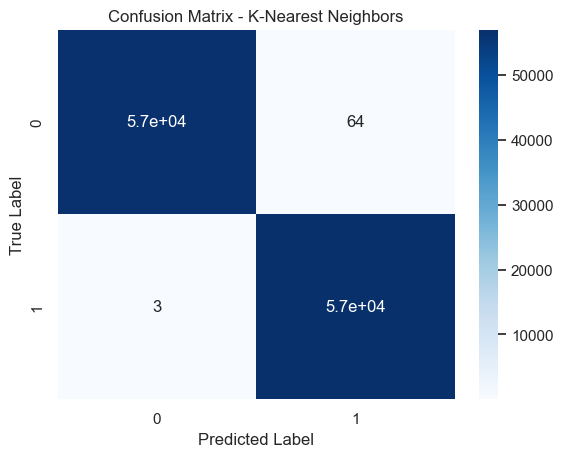

In [22]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.title('Confusion Matrix - ' + name)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()